In [2]:
import tensorflow as tf
import numpy as np

In [3]:
import keras
from keras.models import Sequential

In [110]:
#only model building part
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), #according to X_train however check instructions on the page before use
    pooling='avg', #not required but preferred
    classes=10,#according to yoour need
  
)
for layer in model_part1.layers:
    layer.trainable=False

In [5]:
from keras.layers import Flatten,Dense

In [111]:
model.add(model_part1)

In [112]:
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 50)                102450    
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 23,690,672
Trainable params: 102,960
Non-trainable params: 23,587,712
_________________________________________________________________


In [65]:
fashion_mnist=keras.datasets.fashion_mnist

In [66]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [67]:
X_train.shape

(60000, 28, 28)

In [68]:
X_train[0].shape

(28, 28)

In [101]:
#it is grey scale
#it has fix size of 28,28
X_train_new = np.zeros((60000,32,32,3))

In [102]:
X_train_new.shape

(60000, 32, 32, 3)

In [118]:
import cv2
from PIL import Image

In [127]:
for i in range(X_train.shape[0]):
    temp = cv2.cvtColor(X_train[i], cv2.COLOR_GRAY2RGB)
    X_train_new[i,:,:,:] = cv2.resize(temp,(32, 32),interpolation=cv2.INTER_NEAREST)
#     

In [105]:
# X_train_new = np.reshape(X_train_new,(60000,32,32,1))

In [128]:
X_train_new = X_train_new/255.0

In [129]:
img= cv2.cvtColor(X_train[0],cv2.COLOR_GRAY2RGB) #use loop for converting all images

In [130]:
X_train_new[0].shape

(32, 32, 3)

In [131]:
import matplotlib.pyplot as plt

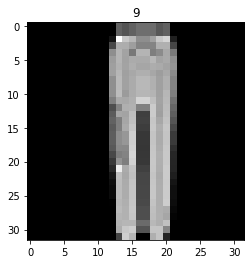

In [135]:
plt.title(Y_train[0])
plt.imshow(X_train_new[1000])

In [136]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [139]:
model.fit(X_train_new,Y_train,epochs=2,batch_size=50)

Epoch 1/2
1200/1200 [==============================] - 279s 232ms/step - loss: 0.6381 - accuracy: 0.7587
Epoch 2/2
1200/1200 [==============================] - 281s 234ms/step - loss: 0.6276 - accuracy: 0.7627


In [ ]:
#assignment 4
#deadline next friday
## use this code to build a ml model based on the given instructions
#convert all images to rgb
#use resnet50